## Diego García Muro
# **Enunciado caso práctico**

**El presente ejercicio es similar al caso práctico de repaso de optimización de campañas de marketing online ya realizado y lo que se pretende con este es asentar los conceptos relativos al algoritmo del bandido multibrazo, como son las ratios de explotación y exploración para la optimización de una campaña de marketing online.**

**Al igual que en el caso práctico de repaso, se tiene que hacer una campaña de marketing online para promocionar un determinado producto con la que se mostrará en una página web un banner con una imagen del producto que promocionar. Se han realizado cinco imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto que promocionar, pero, a diferencia del caso práctico de repaso, los resultados obtenidos serán diferentes, siendo otra imagen la que mayor valor de Q tenga calculado a partir de la siguiente fórmula:**

<img src = "formula_enunciado.png">

**Sin saber a priori cuál es la imagen que captará mayor atención, se debe aprender con base en los clics que se realizan sobre el banner qué imagen será las más llamativa y conseguirá más visitas aplicando el método del bandido multibrazo.**

**El objetivo es encontrar la imagen que capte mayor atención de los usuarios, es decir que mayor número de clics obtenga:**

**Dado el método ya implementado en el notebook “multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)”, se pide, modificando el valor de épsilon, responder a la siguientes preguntas para asentar los conceptos relativos al aprendizaje por refuerzo y, en particular, al algoritmo del bandido multibrazo:**

1. ¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clics?
2. ¿Cuál es la imagen que más clics obtiene y cuantos?
3. Poniendo un ratio de explotación del 100%, ¿qué resultado se obtiene?
   

**Todas estas preguntas deben ser contestadas en el propio notebook.**

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### En primer lugar se identifican las variables del problema y su correspondencia con el algoritmo.

+ **5 imágenes del producto a elegir:** Se corresponden con las 5 tragaperras (bandidos)
+ **Mayor número de clics:** Equivale a obtener la mayor recompensa
+ **Número de clics sobre la imagen i:** Equivale a la suma de recompensas obtenidas en una tragaperras.
+ **Número de impresiones de la página:** Equivale al número de partidas jugadas en cada "tragaperras", las veces que se muestra la imagen en el banner.
+ **Q(imageni):** Recompensa media recibida por la imagen i, donde el número de partidas equivale al número de impresiones y la suma de recompensas al número de clics.
+ **Reocompensa total:** Se suma 1 si se hace clic, 0 en caso contrario. Hay que tener en cuenta que el algoritmo esta implementado para que cada imagen reciba 1 o 0 clics por impresión, podría modificarse para recibir en cada impresión un número aleatorio de clics en caso de ser necesario.
  
### Se utiliza el método **"multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)"** implementado en el caso práctico correspondiente del módulo 3. Se incluye a continuación con comentarios para adaptarlo a este problema.
### Hay que tener en cuenta que sigue una política épsilon-greedy para realizar la siguiente acción: explorar o explotar.
<img src="016_RL.png" style="width: 300px;"/>

In [1]:
import random
import numpy as np


def gen_bandits():
    """
    Función que devuelve una lista de probabilidades ordenadas al azar
    Para este caso práctico se corresponden con la probabilidad de que un usuario haga clic sobre una de las 5 imágenes, 
    probabilidad de obtener "premio"
    """
    bandits = [0.1, 0.1, 0.1, 0.2, 0.6]
    random.shuffle(bandits)
    return bandits
    
    
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    '''
    bandits hace alusión a una lista de probabilidades correspondientes a cada imagen 
    que indican lo probable que es que el usuario haga clic sobre cada una de ellas.
    '''
    bandits = gen_bandits()
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador, número de clics sobre cada imagen
    num_selected_bandit = np.zeros(len(bandits)) # denominador, número de impresiones de cada imagen
    q_bandits = np.zeros(len(bandits))            # Q(a) Número de clics por número de impresiones
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        # Hago una copia de los Q(a)
        old_q_bandits = q_bandits.copy()
        
        # Selecciono "tragaperras" a la que jugar
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward, 1 indica clic sobre imagen y 0 nada
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo el número de clics total (reward total)
        total_reward += reward
        
        # Actualizo valor (Q) de la imagen numero de clics/número de impresiones
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit,acum_reward_bandit

### 1.¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clics?
Si se quiere maximizar la imagen con el mayor número de clics hay que utilizar una política que permita explorar poco y explotar mucho. Si se usa un valor de épsilon medio-alto al principio, que permita explorar, se podría llegar a identificar la imagen que más atrae la atención y por lo tanto más clics fuese a recibir. Una vez identificada se procedería a explotar con un valor bajo de épsilon para explorar muy de vez en cuando y maximizar la explotación de esta imagen. Con ello, el valor que maximiza la imagen con mayor número de clics es un valor cercano a 0 o 0. Si solo se explota con épsilon igual a 0, la primera imagen que reciba un clic se explotaría recibiendo un número variable de clics pues no siempre es la mejor, si por el contrario únicamente se explora, todas las imágenes acaban recibiendo un número similar de clics pues se escogen al azar. Utilizando un valor de épsilon igual a 0.1, es decir, un ratio de exploración del 10%, se obtiene tras N ejecuciones, por ejemplo 10 o 100, una media de clics mayor a los que se obtienen para el valor 0, no obstante para este valor, ninguna otra imagen recibirá un clic y se maximiza así el número de clics que recibe una imagen respecto del resto, que no tiene por que ser la que más clics recibiese si se realizara un proceso de exploración correcto.

Clics totales por ejecución para épsilon = 0.1 -> [545, 583, 538, 566, 525, 557, 525, 475, 569, 544]
Clics totales por ejecución para épsilon = 0.0 -> [613, 570, 91, 572, 600, 618, 103, 606, 625, 621]

Media clics totales por ejecución para épsilon = 0.1 -> 542.7
Media clics totales por ejecución para épsilon = 0.0 -> 501.9


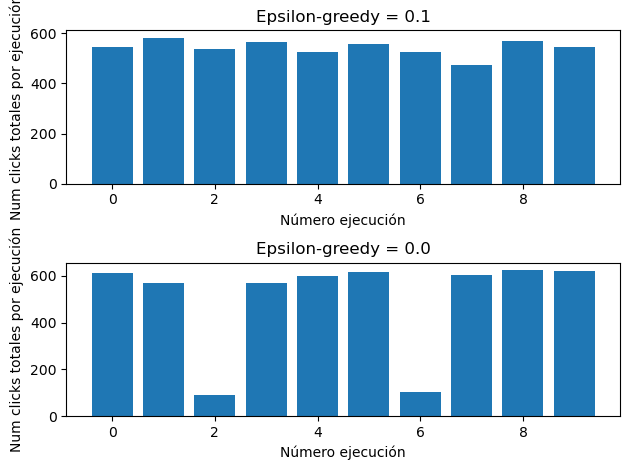

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.set_printoptions(precision=4)
total_a = []
total_b = []
for t in range(10):
    imagenes_a, total_clics_a, q_imagen, num_selected_img, acum_clics_img_a = multi_armed_bandit(num_games=1000, 
                                                                               epsilon=0.1, 
                                                                               verbose=False)
    imagenes_b, total_clics_b, q_imagen, num_selected_img, acum_clics_img_b = multi_armed_bandit(num_games=1000, 
                                                                               epsilon=0, 
                                                                               verbose=False)
    total_a.append(total_clics_a)
    total_b.append(total_clics_b)
    
print(f"Clics totales por ejecución para épsilon = 0.1 -> {total_a}")
print(f"Clics totales por ejecución para épsilon = 0.0 -> {total_b}")
print()
print(f"Media clics totales por ejecución para épsilon = 0.1 -> {np.mean(total_a)}")
print(f"Media clics totales por ejecución para épsilon = 0.0 -> {np.mean(total_b)}")

plt.subplot(2,1,1)
plt.title('Epsilon-greedy = 0.1')
plt.bar(range(0,len(total_a)), total_a)
plt.xlabel('Número ejecución')
plt.ylabel('Num clicks totales por ejecución')
plt.subplot(2,1,2)
plt.title('Epsilon-greedy = 0.0')
plt.bar(range(0,len(total_b)), total_b)
plt.xlabel('Número ejecución')
plt.ylabel('Num clicks totales por ejecución')
plt.tight_layout()
plt.show()

Clicks por imagen para épsilon = 0.1: [522.   2.   9.   1.   2.]
Clicks por imagen para épsilon = 0.0: [  0.   0.   0.   0. 104.]


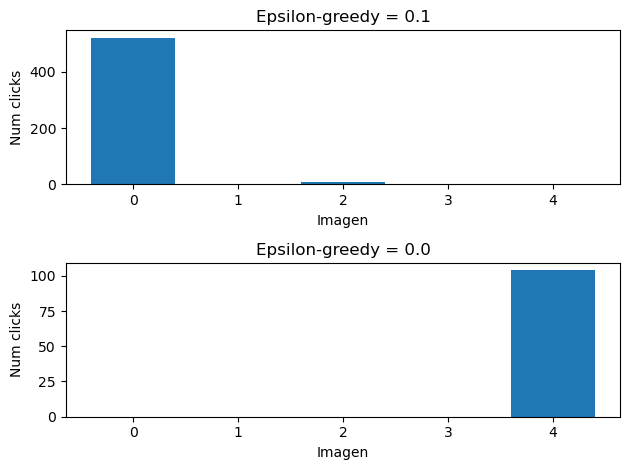

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.set_printoptions(precision=4)


imagenes_a, total_clics_a, q_imagen, num_selected_img, acum_clics_img_a = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.1, 
                                                                           verbose=False)
imagenes_b, total_clics_b, q_imagen, num_selected_img, acum_clics_img_b = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0, 
                                                                           verbose=False)

print("Clicks por imagen para épsilon = 0.1: {}".format(acum_clics_img_a))
print("Clicks por imagen para épsilon = 0.0: {}".format(acum_clics_img_b))

plt.subplot(2,1,1)
plt.title('Epsilon-greedy = 0.1')
plt.bar(range(0,len(acum_clics_img_a)), acum_clics_img_a)
plt.xlabel('Imagen')
plt.ylabel('Num clicks')
plt.subplot(2,1,2)
plt.title('Epsilon-greedy = 0.0')
plt.bar(range(0,len(acum_clics_img_b)), acum_clics_img_b)
plt.xlabel('Imagen')
plt.ylabel('Num clicks')
plt.tight_layout()
plt.show()

### 2.¿Cuál es la imagen que más clics obtiene y cuantos?
Como se ha mencionado previamente, con el valor de épsilon igual a 0, la imagen que más clics obtiene es la que previamente recibió un clic, pues de acuerdo con el algoritmo, a partir de ese momento solo se explota, sin llevar a cabo ningún proceso de exploración. El número de clics en el algoritmo implementado es aleatorio, dependiente de una probabilidad. En caso de no serlo, en cada impresión una imagen siempre recibiría clic (premio), con lo que la imagen primeramente seleccionada recibiría un número de clics igual al número de impresiones, es decir 1000 en este caso, teniendo en cuenta que en cada impresión una imagen puede recibir 1 clic o ninguno. Lanzando multiples veces el algoritmo expuesto a continuación se observa que la imagen seleccionada cambia en cada ejecución pero es la que recibe todos los clics la primera que recibe un clic. 

Distribución inicial de las imagenes
  [0.2, 0.1, 0.1, 0.1, 0.6]
Número de veces que se ha seleccionado cada imagen
  [   0.    0. 1000.    0.    0.]
Q(imagene i)
  [0.    0.    0.114 0.    0.   ]
Clics en total: 114
Clicks por imagen: [  0.   0. 114.   0.   0.]


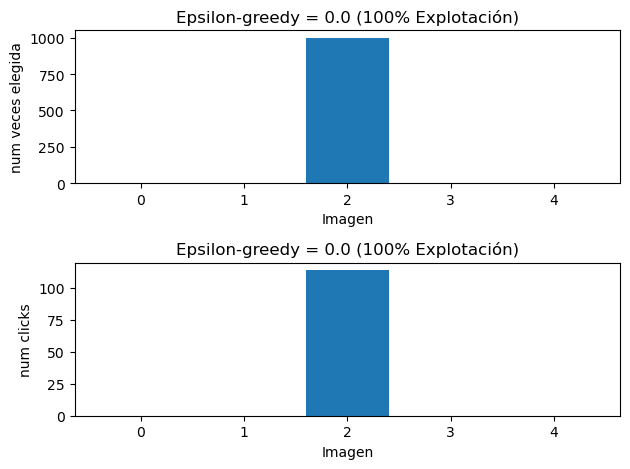

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

imagenes, total_clics, q_imagen, num_selected_img, acum_clics_img = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0, 
                                                                           verbose=False)
print("Distribución inicial de las imagenes\n  {}".format(imagenes))
print("Número de veces que se ha seleccionado cada imagen\n  {}".format(num_selected_img))
print("Q(imagene i)\n  {}".format(q_imagen))
print("Clics en total: {}".format(total_clics))
print("Clicks por imagen: {}".format(acum_clics_img))
# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.subplot(2,1,1)
plt.title('Epsilon-greedy = 0.0 (100% Explotación)')
plt.bar(range(0,len(num_selected_img)), num_selected_img)
plt.xlabel('Imagen')
plt.ylabel('num veces elegida')
plt.subplot(2,1,2)
plt.title('Epsilon-greedy = 0.0 (100% Explotación)')
plt.bar(range(0,len(acum_clics_img)), acum_clics_img)
plt.xlabel('Imagen')
plt.ylabel('num clicks')
plt.tight_layout()
plt.show()

### 3.Poniendo un ratio de explotación del 100%, ¿qué resultado se obtiene?
Al indicar un ratio de explotación con un valor igual al 100% se está indicando que el 100% de las veces se explota, es decir se tiene un valor de épsilon igual a 0.0, pues el ratio de exploración es del 0%. En este caso se seleccionan imágenes al azar hasta que se clica en una. Esto es debido a que en un principio todas tienen un valor Q igual a 0.0 y no es hasta que ocurre el primer clic que cambia el valor de Q para la imagen clicada. A partir de ese momento se explota completamente la imagen seleccionada, sin posibilidad a explorar otras imágenes. Si por el contrario se usase un ratio de exploración del 100%, no se podría obtener una predicción fiable, pues las imágenes se eligirían al azar sin ningún tipo de criterio basado en el número de clics y todas recibirían un número similar de clics. A continaución se muestran ambos casos.

Distribución inicial de las imagenes (Epsilon-greedy = 0)
  [0.1, 0.1, 0.2, 0.1, 0.6]
Número de veces que se ha seleccionado cada imagen (Epsilon-greedy = 0)
  [  2.   2.   2.   1. 993.]
Q(imagene i) (Epsilon-greedy = 0)
  [0.     0.     0.     0.     0.5911]
Clics en total (Epsilon-greedy = 0): 587
----------------------------------------------------------------------------------------------------
Distribución inicial de las imagenes (Epsilon-greedy = 1)
  [0.2, 0.1, 0.1, 0.6, 0.1]
Número de veces que se ha seleccionado cada imagen (Epsilon-greedy = 1)
  [194. 218. 207. 188. 193.]
Q(imagene i) (Epsilon-greedy = 1)
  [0.1959 0.1147 0.1449 0.5585 0.0829]
Clics en total (Epsilon-greedy = 1): 214


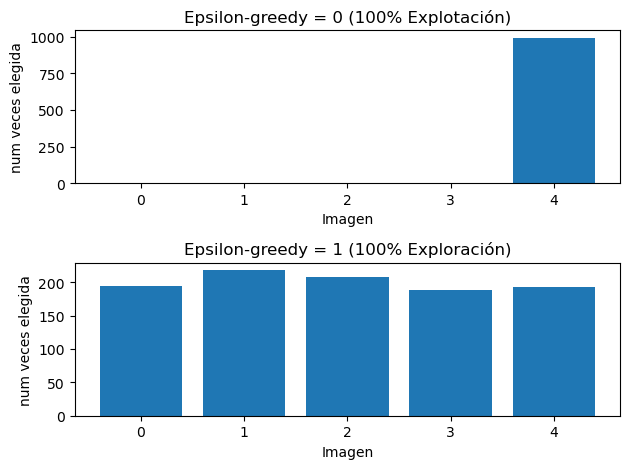

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

'''
Usando ratio de explotación del 100%: épsilon= 0.0
'''
imagenes_a, total_clics_a, q_imagen_a, num_selected_img_a, acum_clics_img_a = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=0.0, 
                                                                           verbose=False)

'''
Usando ratio de exploración del 100%: épsilon= 1.0
'''
imagenes_b, total_clics_b, q_imagen_b, num_selected_img_b, acum_clics_img_b = multi_armed_bandit(num_games=1000, 
                                                                           epsilon=1.0, 
                                                                           verbose=False)

print("Distribución inicial de las imagenes (Epsilon-greedy = 0)\n  {}".format(imagenes_a))
print("Número de veces que se ha seleccionado cada imagen (Epsilon-greedy = 0)\n  {}".format(num_selected_img_a))
print("Q(imagene i) (Epsilon-greedy = 0)\n  {}".format(q_imagen_a))
print("Clics en total (Epsilon-greedy = 0): {}".format(total_clics_a))
print("-"*100)
print("Distribución inicial de las imagenes (Epsilon-greedy = 1)\n  {}".format(imagenes_b))
print("Número de veces que se ha seleccionado cada imagen (Epsilon-greedy = 1)\n  {}".format(num_selected_img_b))
print("Q(imagene i) (Epsilon-greedy = 1)\n  {}".format(q_imagen_b))
print("Clics en total (Epsilon-greedy = 1): {}".format(total_clics_b))


plt.subplot(2,1,1)
plt.title('Epsilon-greedy = 0 (100% Explotación)')
plt.bar(range(0,len(num_selected_img_a)), num_selected_img_a)
plt.xlabel('Imagen')
plt.ylabel('num veces elegida')
plt.subplot(2,1,2)
plt.title('Epsilon-greedy = 1 (100% Exploración)')
plt.bar(range(0,len(num_selected_img_b)), num_selected_img_b)
plt.xlabel('Imagen')
plt.ylabel('num veces elegida')
plt.tight_layout()
plt.show()